In [84]:
import pandas as pd
import seaborn as sns
import numpy as np

# Basic Exploratory Data Analysis

In [125]:
# load data
data = pd.read_csv('../data/student_dropout_data.csv')

# print first 5 rows
data.head()

,attendance_rate,test_score,engagement_score,dropout
0,0.900,43.77,0.822,0
1,0.836,58.69,0.862,0
2,0.915,59.86,0.967,0
3,1.000,52.97,0.961,0
4,0.827,62.58,0.474,0


In [126]:
# check for missing data
data.isnull().sum()
data.dropna(inplace=True)

In [127]:
# Summary stats
data.describe()

,attendance_rate,test_score,engagement_score,dropout
count,100.000000,100.00000,100.000000,100.000000
mean,0.839080,65.25730,0.747430,0.090000
std,0.089746,14.10037,0.187069,0.287623
min,0.588000,36.22000,0.102000,0.000000
25%,0.790000,52.91750,0.618750,0.000000
50%,0.837000,66.26000,0.769500,0.000000
75%,0.891000,73.07250,0.890750,0.000000
max,1.000000,100.00000,1.000000,1.000000


In [128]:
data.head()

,attendance_rate,test_score,engagement_score,dropout
0,0.900,43.77,0.822,0
1,0.836,58.69,0.862,0
2,0.915,59.86,0.967,0
3,1.000,52.97,0.961,0
4,0.827,62.58,0.474,0


# Feature Engineering

1. Select input features (X) and target label (y)
2. Split the dataset into training and test sets
3. Optionally normalize or scale the features (good for Logistic Regression)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
# Define feature columns and label
feature = ['attendance_rate', 'test_score', 'engagement_score']
target = 'dropout'

X = data[feature]
y = data[target]

In [131]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Featue scalaing (Important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Model Training

1. Logistic Regression – great for interpretability and baseline results
2. Decision Tree Classifier – good for capturing nonlinear relationships and feature

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [134]:
# Initialize models
log_reg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation

1. Accuracy: Overall correctness
2. Precision: How many predicted dropouts were actually dropouts
3. Recall: How many actual dropouts the model identified
4. Confusion Matrix: Breakdown of predictions

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [136]:
# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test)

In [137]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n📊 {name} Performance:")

    eval_modules = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'Confusion Matrix': confusion_matrix(y_test, y_pred, labels=[0, 1])
    }

    for metric, value in eval_modules.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.2f}")


In [138]:
# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)


📊 Logistic Regression Performance:
Accuracy: 1.00
Precision: 0.00
Recall: 0.00
Confusion Matrix:
[[20  0]
 [ 0  0]]

📊 Decision Tree Performance:
Accuracy: 0.90
Precision: 0.00
Recall: 0.00
Confusion Matrix:
[[18  2]
 [ 0  0]]


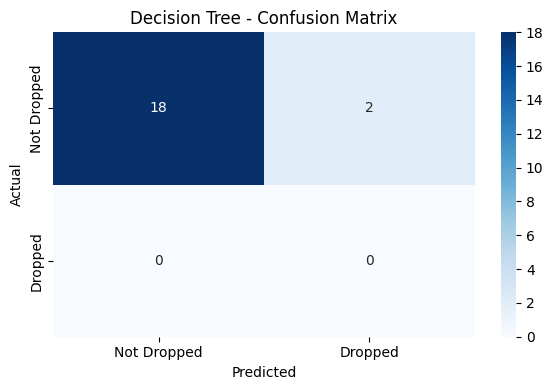

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tree, labels=[0, 1])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Dropped', 'Dropped'], yticklabels=['Not Dropped', 'Dropped'])
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("../visuals/confusion_matrix.png")
plt.show()


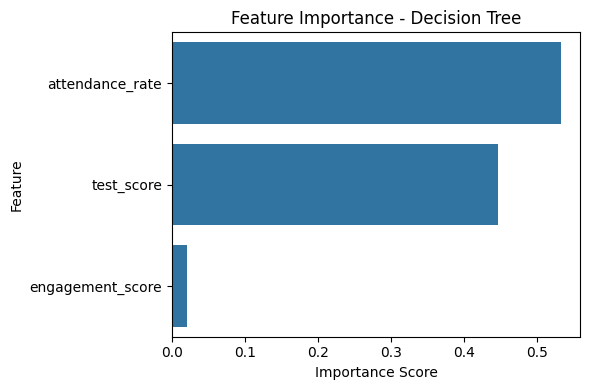

In [ ]:
import numpy as np

# Get feature importances
importances = tree.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../visuals/feature_importance.png")
plt.show()


In [142]:
import pickle

# save trained decision tree model
with open("../model/dropout_model.pkl", "wb") as f:
    pickle.dump(tree, f)
    
# save the scaler
with open("../model/scaler.pkl", 'wb') as f:
    pickle.dump(scaler, f)